In [1]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from deepMacroFin import PDEModel
from deepMacroFin import ActivationType, Comparator, EndogVar, EndogVarConditions, EndogEquation

## System Model 1
$$\begin{bmatrix}\dot{x} \\ \dot{y}\end{bmatrix} = \begin{bmatrix} x+3y \\ 3x+y\end{bmatrix}, \begin{bmatrix}x(0) \\ y(0)\end{bmatrix} = \begin{bmatrix}1 \\ 0\end{bmatrix}$$

Solution: $\begin{bmatrix} x\\ y \end{bmatrix} = \frac{1}{2}\begin{bmatrix} e^{4t} + e^{-2t}\\ e^{4t} - e^{-2t} \end{bmatrix}$

In [2]:
ode1 = PDEModel("ode_system1")
ode1.set_state(["t"], {"t": [0., 1.]})
ode1.add_endog("x", config={
    "device": "cuda" if torch.cuda.is_available() else "cpu",
    "hidden_units": [50, 50, 50],
    "activation_type": ActivationType.Tanh,
    "positive": False,
    "derivative_order": 2,
})
ode1.add_endog("y", config={
    "device": "cuda" if torch.cuda.is_available() else "cpu",
    "hidden_units": [50, 50, 50],
    "activation_type": ActivationType.Tanh,
    "positive": False,
    "derivative_order": 2,
})
ode1.add_endog_equation("x_t = x + 3*y", label="base_ode1", weight=0.1)
ode1.add_endog_equation("y_t = 3*x + 1*y", label="base_ode2", weight=0.1)
ode1.add_endog_condition("x", 
                              "x(SV)", {"SV": torch.zeros((1, 1))},
                              Comparator.EQ,
                              "1", {},
                              label="ic_x")
ode1.add_endog_condition("y", 
                              "y(SV)", {"SV": torch.zeros((1, 1))},
                              Comparator.EQ,
                              "0", {},
                              label="ic_y")
print(ode1)
if not os.path.exists("./models/ode_system1.pt"):
    ode1.train_model("./models", "ode_system1.pt", True)
    ode1.eval_model(True)
else:
    ode1.load_model(torch.load("./models/ode_system1.pt"))
    ode1.eval_model(True)

==========================Summary of Model ode_system1==========================
Config: {
 "batch_size": 100,
 "num_epochs": 1000,
 "lr": 0.001
}
Latex Variable Mapping: {}

================================State Variables=================================
t: [0.0, 1.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: x
EndogVar(
  (model): Sequential(
    (linear_0): Linear(in_features=1, out_features=50, bias=True)
    (activation_0): Tanh()
    (linear_1): Linear(in_features=50, out_features=50, bias=True)
    (activation_1): Tanh()
    (linear_2): Linear(in_features=50, out_features=50, bias=True)
    (activation_2): Tanh()
    (final_layer): Linear(in_features=50, out_features=1, bias=True)
  )
)
Num parameters: 5251
----------------------------------------------

Total loss: 0.2116: 100%|██████████| 1000/1000 [00:18<00:00, 53.50it/s]

training finished, total time :: 18.702136516571045
Model saved to ./models/ode_system1.pt
===================================Evaluating===================================
loss :: endogeq_base_ode1: 0.6041,
endogeq_base_ode2: 0.5614,
endogvar_x_cond_ic_x: 0.0510,
endogvar_y_cond_ic_y: 0.0494,
total_loss: 0.2170


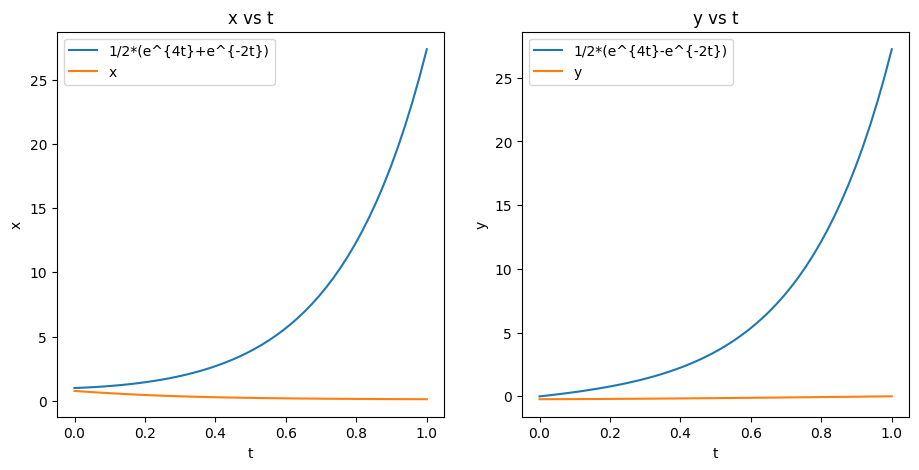

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(11, 5))
t = np.linspace(0., 1)
ax[0].plot(t, 0.5*(np.exp(4*t) + np.exp(-2*t)), label="1/2*(e^{4t}+e^{-2t})")
ax[1].plot(t, 0.5*(np.exp(4*t) - np.exp(-2*t)), label="1/2*(e^{4t}-e^{-2t})")
ode1.endog_vars["x"].plot("x", {"t": [0., 1.]}, ax=ax[0])
ode1.endog_vars["y"].plot("y", {"t": [0., 1.]}, ax=ax[1])
plt.subplots_adjust()
plt.show()

## System Model 2
$$\begin{bmatrix}\dot{x} \\ \dot{y}\end{bmatrix} = \begin{bmatrix} y \\ x\end{bmatrix}, \begin{bmatrix}x(0) \\ y(0)\end{bmatrix} = \begin{bmatrix}1 \\ 0\end{bmatrix}$$

Solution: $\begin{bmatrix} x\\ y \end{bmatrix} = \frac{1}{2}\begin{bmatrix} e^{t} + e^{-t}\\ e^{t} - e^{-t} \end{bmatrix}$

In [4]:
ode2 = PDEModel("ode_system2")
ode2.set_state(["t"], {"t": [0., 1.]})
ode2.add_endog("x")
ode2.add_endog("y")
ode2.add_endog_equation("x_t = y", label="base_ode1")
ode2.add_endog_equation("y_t = x", label="base_ode2")
ode2.add_endog_condition("x", 
                              "x(SV)", {"SV": torch.zeros((1, 1))},
                              Comparator.EQ,
                              "1", {},
                              label="ic_x")
ode2.add_endog_condition("y", 
                              "y(SV)", {"SV": torch.zeros((1, 1))},
                              Comparator.EQ,
                              "0", {},
                              label="ic_y")
print(ode2)
if not os.path.exists("./models/ode_system2.pt"):
    ode2.train_model("./models", "ode_system2.pt", True)
    ode2.eval_model(True)
else:
    ode2.load_model(torch.load("./models/ode_system2.pt"))
    ode2.eval_model(True)

==========================Summary of Model ode_system2==========================
Config: {
 "batch_size": 100,
 "num_epochs": 1000,
 "lr": 0.001
}
Latex Variable Mapping: {}

================================State Variables=================================
t: [0.0, 1.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: x
EndogVar(
  (model): Sequential(
    (linear_0): Linear(in_features=1, out_features=30, bias=True)
    (activation_0): Tanh()
    (linear_1): Linear(in_features=30, out_features=30, bias=True)
    (activation_1): Tanh()
    (linear_2): Linear(in_features=30, out_features=30, bias=True)
    (activation_2): Tanh()
    (linear_3): Linear(in_features=30, out_features=30, bias=True)
    (activation_3): Tanh()
    (final_layer): Linear(in_features=30, out_fe

  0%|          | 0/1000 [00:00<?, ?it/s]

Total loss: 0.0004: 100%|██████████| 1000/1000 [00:17<00:00, 56.66it/s]

training finished, total time :: 17.655184745788574
Model saved to ./models/ode_system2.pt
===================================Evaluating===================================
loss :: endogeq_base_ode1: 0.0003,
endogeq_base_ode2: 0.0001,
endogvar_x_cond_ic_x: 0.0000,
endogvar_y_cond_ic_y: 0.0000,
total_loss: 0.0004


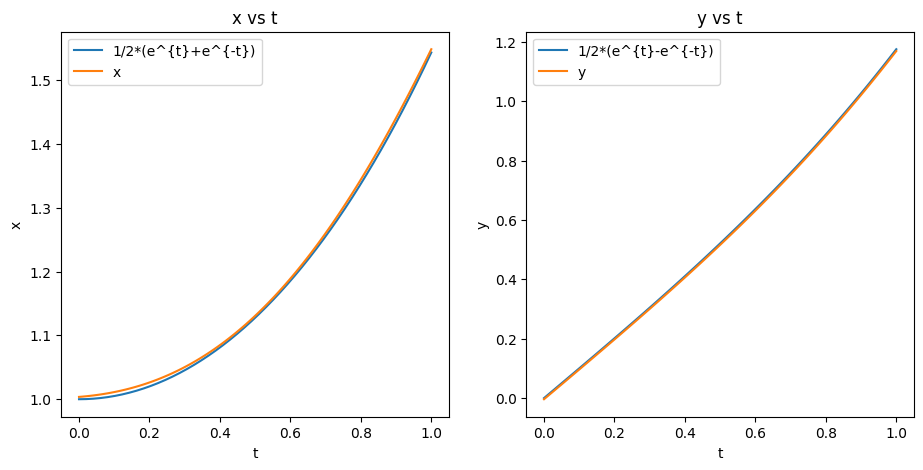

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(11, 5))
t = np.linspace(0., 1)
ax[0].plot(t, 0.5*(np.exp(t) + np.exp(-t)), label="1/2*(e^{t}+e^{-t})")
ax[1].plot(t, 0.5*(np.exp(t) - np.exp(-t)), label="1/2*(e^{t}-e^{-t})")
ode2.endog_vars["x"].plot("x", {"t": [0., 1.]}, ax=ax[0])
ode2.endog_vars["y"].plot("y", {"t": [0., 1.]}, ax=ax[1])
plt.subplots_adjust()
plt.show()

## System Model 3
$$\begin{bmatrix}\dot{x} \\ \dot{y}\end{bmatrix} = \begin{bmatrix} -0.25x + 1.75y \\ 1.75x-0.25y\end{bmatrix}, \begin{bmatrix}x(0) \\ y(0)\end{bmatrix} = \begin{bmatrix}1 \\ 0\end{bmatrix}$$

Solution: $\begin{bmatrix} x\\ y \end{bmatrix} = \frac{1}{2}\begin{bmatrix} e^{1.5t} + e^{-2t}\\ e^{1.5t} - e^{-2t} \end{bmatrix}$

In [6]:
ode3 = PDEModel("ode_system3")
ode3.set_state(["t"], {"t": [0., 1.]})
ode3.add_endog("x")
ode3.add_endog("y")
ode3.add_endog_equation("x_t = -0.25*x + 1.75*y", label="base_ode1")
ode3.add_endog_equation("y_t = 1.75*x - 0.25*y", label="base_ode2")
ode3.add_endog_condition("x", 
                              "x(SV)", {"SV": torch.zeros((1, 1))},
                              Comparator.EQ,
                              "1", {},
                              label="ic_x")
ode3.add_endog_condition("y", 
                              "y(SV)", {"SV": torch.zeros((1, 1))},
                              Comparator.EQ,
                              "0", {},
                              label="ic_y")
print(ode3)
if not os.path.exists("./models/ode_system3.pt"):
    ode3.train_model("./models", "ode_system3.pt", True)
    ode3.eval_model(True)
else:
    ode3.load_model(torch.load("./models/ode_system3.pt"))
    ode3.eval_model(True)

==========================Summary of Model ode_system3==========================
Config: {
 "batch_size": 100,
 "num_epochs": 1000,
 "lr": 0.001
}
Latex Variable Mapping: {}

================================State Variables=================================
t: [0.0, 1.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: x
EndogVar(
  (model): Sequential(
    (linear_0): Linear(in_features=1, out_features=30, bias=True)
    (activation_0): Tanh()
    (linear_1): Linear(in_features=30, out_features=30, bias=True)
    (activation_1): Tanh()
    (linear_2): Linear(in_features=30, out_features=30, bias=True)
    (activation_2): Tanh()
    (linear_3): Linear(in_features=30, out_features=30, bias=True)
    (activation_3): Tanh()
    (final_layer): Linear(in_features=30, out_fe

Total loss: 0.0016: 100%|██████████| 1000/1000 [00:12<00:00, 77.87it/s]

training finished, total time :: 12.84768033027649
Model saved to ./models/ode_system3.pt
===================================Evaluating===================================
loss :: endogeq_base_ode1: 0.0007,
endogeq_base_ode2: 0.0003,
endogvar_x_cond_ic_x: 0.0002,
endogvar_y_cond_ic_y: 0.0000,
total_loss: 0.0012


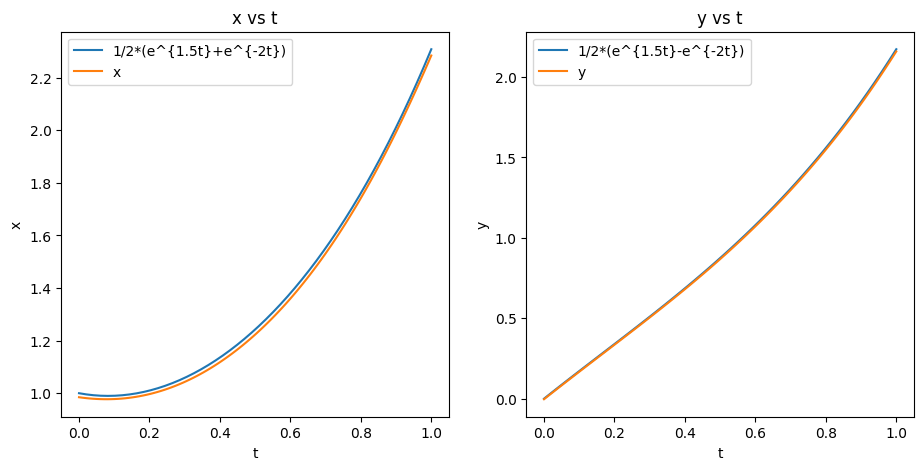

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(11, 5))
t = np.linspace(0., 1)
ax[0].plot(t, 0.5*(np.exp(1.5*t) + np.exp(-2*t)), label="1/2*(e^{1.5t}+e^{-2t})")
ax[1].plot(t, 0.5*(np.exp(1.5*t) - np.exp(-2*t)), label="1/2*(e^{1.5t}-e^{-2t})")
ode3.endog_vars["x"].plot("x", {"t": [0., 1.]}, ax=ax[0])
ode3.endog_vars["y"].plot("y", {"t": [0., 1.]}, ax=ax[1])
plt.subplots_adjust()
plt.show()

## System Model 4
$$\begin{bmatrix}\dot{x} \\ \dot{y}\end{bmatrix} = \begin{bmatrix} 0.5x + 1.5y \\ 1.5x+0.5y\end{bmatrix}, \begin{bmatrix}x(0) \\ y(0)\end{bmatrix} = \begin{bmatrix}1 \\ 0\end{bmatrix}$$

Solution: $\begin{bmatrix} x\\ y \end{bmatrix} = \frac{1}{2}\begin{bmatrix} e^{2t} + e^{-t}\\ e^{2t} - e^{-t} \end{bmatrix}$

In [8]:
ode4 = PDEModel("ode_system4")
ode4.set_state(["t"], {"t": [0., 1.]})
ode4.add_endog("x")
ode4.add_endog("y")
ode4.add_endog_equation("x_t = 0.5*x + 1.5*y", label="base_ode1")
ode4.add_endog_equation("y_t = 1.5*x + 0.5*y", label="base_ode2")
ode4.add_endog_condition("x", 
                              "x(SV)", {"SV": torch.zeros((1, 1))},
                              Comparator.EQ,
                              "1", {},
                              label="ic_x")
ode4.add_endog_condition("y", 
                              "y(SV)", {"SV": torch.zeros((1, 1))},
                              Comparator.EQ,
                              "0", {},
                              label="ic_y")
print(ode4)
if not os.path.exists("./models/ode_system4.pt"):
    ode4.train_model("./models", "ode_system4.pt", True)
    ode4.eval_model(True)
else:
    ode4.load_model(torch.load("./models/ode_system4.pt"))
    ode4.eval_model(True)

==========================Summary of Model ode_system4==========================
Config: {
 "batch_size": 100,
 "num_epochs": 1000,
 "lr": 0.001
}
Latex Variable Mapping: {}

================================State Variables=================================
t: [0.0, 1.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: x
EndogVar(
  (model): Sequential(
    (linear_0): Linear(in_features=1, out_features=30, bias=True)
    (activation_0): Tanh()
    (linear_1): Linear(in_features=30, out_features=30, bias=True)
    (activation_1): Tanh()
    (linear_2): Linear(in_features=30, out_features=30, bias=True)
    (activation_2): Tanh()
    (linear_3): Linear(in_features=30, out_features=30, bias=True)
    (activation_3): Tanh()
    (final_layer): Linear(in_features=30, out_fe

Total loss: 0.0016: 100%|██████████| 1000/1000 [00:13<00:00, 74.07it/s]

training finished, total time :: 13.506802797317505
Model saved to ./models/ode_system4.pt
===================================Evaluating===================================
loss :: endogeq_base_ode1: 0.0001,
endogeq_base_ode2: 0.0002,
endogvar_x_cond_ic_x: 0.0001,
endogvar_y_cond_ic_y: 0.0000,
total_loss: 0.0005


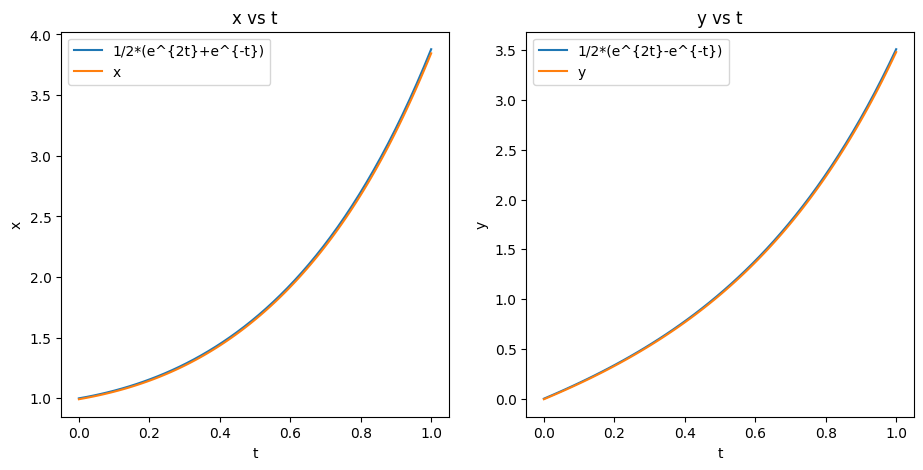

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(11, 5))
t = np.linspace(0., 1)
ax[0].plot(t, 0.5*(np.exp(2*t) + np.exp(-t)), label="1/2*(e^{2t}+e^{-t})")
ax[1].plot(t, 0.5*(np.exp(2*t) - np.exp(-t)), label="1/2*(e^{2t}-e^{-t})")
ode4.endog_vars["x"].plot("x", {"t": [0., 1.]}, ax=ax[0])
ode4.endog_vars["y"].plot("y", {"t": [0., 1.]}, ax=ax[1])
plt.subplots_adjust()
plt.show()

## System Model 5
$$\begin{bmatrix}\dot{x} \\ \dot{y}\end{bmatrix} = \begin{bmatrix} 0.5x + 2.5y \\ 2.5x+0.5y\end{bmatrix}, \begin{bmatrix}x(0) \\ y(0)\end{bmatrix} = \begin{bmatrix}1 \\ 0\end{bmatrix}$$

Solution: $\begin{bmatrix} x\\ y \end{bmatrix} = \frac{1}{2}\begin{bmatrix} e^{3t} + e^{-2t}\\ e^{3t} - e^{-2t} \end{bmatrix}$

In [10]:
ode5 = PDEModel("ode_system5")
ode5.set_state(["t"], {"t": [0., 1.]})
ode5.add_endog("x")
ode5.add_endog("y")
ode5.add_endog_equation("x_t = 0.5*x + 1.5*y", label="base_ode1")
ode5.add_endog_equation("y_t = 1.5*x + 0.5*y", label="base_ode2")
ode5.add_endog_condition("x", 
                              "x(SV)", {"SV": torch.zeros((1, 1))},
                              Comparator.EQ,
                              "1", {},
                              label="ic_x")
ode5.add_endog_condition("y", 
                              "y(SV)", {"SV": torch.zeros((1, 1))},
                              Comparator.EQ,
                              "0", {},
                              label="ic_y")
print(ode5)
if not os.path.exists("./models/ode_system5.pt"):
    ode5.train_model("./models", "ode_system5.pt", True)
    ode5.eval_model(True)
else:
    ode5.load_model(torch.load("./models/ode_system5.pt"))
    ode5.eval_model(True)

==========================Summary of Model ode_system5==========================
Config: {
 "batch_size": 100,
 "num_epochs": 1000,
 "lr": 0.001
}
Latex Variable Mapping: {}

================================State Variables=================================
t: [0.0, 1.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: x
EndogVar(
  (model): Sequential(
    (linear_0): Linear(in_features=1, out_features=30, bias=True)
    (activation_0): Tanh()
    (linear_1): Linear(in_features=30, out_features=30, bias=True)
    (activation_1): Tanh()
    (linear_2): Linear(in_features=30, out_features=30, bias=True)
    (activation_2): Tanh()
    (linear_3): Linear(in_features=30, out_features=30, bias=True)
    (activation_3): Tanh()
    (final_layer): Linear(in_features=30, out_fe

Total loss: 0.0016: 100%|██████████| 1000/1000 [00:12<00:00, 81.76it/s]

training finished, total time :: 12.23655915260315
Model saved to ./models/ode_system5.pt
===================================Evaluating===================================
loss :: endogeq_base_ode1: 0.0001,
endogeq_base_ode2: 0.0002,
endogvar_x_cond_ic_x: 0.0001,
endogvar_y_cond_ic_y: 0.0000,
total_loss: 0.0005


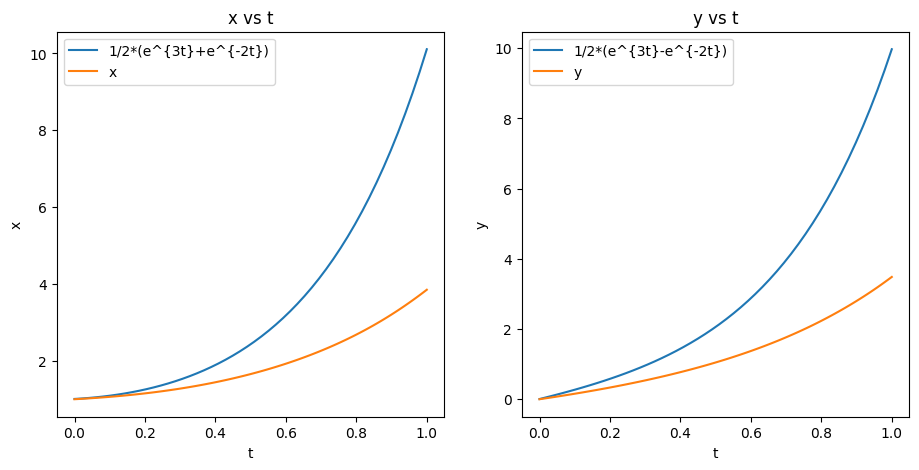

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(11, 5))
t = np.linspace(0., 1)
ax[0].plot(t, 0.5*(np.exp(3*t) + np.exp(-2*t)), label="1/2*(e^{3t}+e^{-2t})")
ax[1].plot(t, 0.5*(np.exp(3*t) - np.exp(-2*t)), label="1/2*(e^{3t}-e^{-2t})")
ode5.endog_vars["x"].plot("x", {"t": [0., 1.]}, ax=ax[0])
ode5.endog_vars["y"].plot("y", {"t": [0., 1.]}, ax=ax[1])
plt.subplots_adjust()
plt.show()

## Predator-Prey Model (Lotka–Volterra)
$$\begin{bmatrix}\dot{x} \\ \dot{y}\end{bmatrix} = \begin{bmatrix} \alpha x - \beta xy \\ \delta xy - \gamma y\end{bmatrix}$$

In the example, $\alpha=1.1, \beta=0.4, \delta=0.4, \gamma=0.1$

$f_x=1.1-0.4y, f_y=-0.4x$  
$g_x=0.4y, g_y=0.4x-0.1$

The fixed points (Solutions to $\begin{cases}f(x,y)=0\\ g(x,y)=0\end{cases}$) are:  
- $(0,0)$, $J=\begin{bmatrix}1.1 & 0\\ 0 & -0.1\end{bmatrix}$, $\lambda_1=1.1, v_1=\begin{bmatrix}1\\ 0\end{bmatrix},\lambda_2=-0.1, v_1=\begin{bmatrix}0\\ 1\end{bmatrix}$ is a saddle point.
- $\left(\frac{1}{4},\frac{11}{4}\right)$, $J=\begin{bmatrix}0 & -1.1\\ 1.1 & 1\end{bmatrix}$, $\lambda_1=\frac{5+4\sqrt{6}i}{10},\lambda_2=\frac{5-4\sqrt{6}i}{10}$ is a spiral source (Real part is positive).

In [12]:
lv = PDEModel("lotka_volterra", {"num_epochs": 2000})
lv.set_state(["t"], {"t": [0., 5.]})
lv.add_endog("x")
lv.add_endog("y")
lv.add_endog_equation("x_t = 1.1 * x - 0.4*x*y", label="base_ode1")
lv.add_endog_equation("y_t = 0.4 * x * y - 0.1 * y")
lv.add_endog_condition("x", 
                              "x(SV)", {"SV": torch.zeros((1, 1))},
                              Comparator.EQ,
                              "1", {},
                              label="initial_condition")
lv.add_endog_condition("y", 
                              "y(SV)", {"SV": torch.zeros((1, 1))},
                              Comparator.EQ,
                              "1", {},
                              label="initial_condition")
print(lv)
if not os.path.exists("./models/lotka_volterra.pt"):
    lv.train_model("./models", "lotka_volterra.pt", True)
    lv.eval_model(True)
else:
    lv.load_model(torch.load("./models/lotka_volterra.pt"))
    lv.eval_model(True)

========================Summary of Model lotka_volterra=========================
Config: {
 "batch_size": 100,
 "num_epochs": 2000,
 "lr": 0.001
}
Latex Variable Mapping: {}

================================State Variables=================================
t: [0.0, 5.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: x
EndogVar(
  (model): Sequential(
    (linear_0): Linear(in_features=1, out_features=30, bias=True)
    (activation_0): Tanh()
    (linear_1): Linear(in_features=30, out_features=30, bias=True)
    (activation_1): Tanh()
    (linear_2): Linear(in_features=30, out_features=30, bias=True)
    (activation_2): Tanh()
    (linear_3): Linear(in_features=30, out_features=30, bias=True)
    (activation_3): Tanh()
    (final_layer): Linear(in_features=30, out_fe

Total loss: 0.0001: 100%|██████████| 2000/2000 [00:23<00:00, 86.82it/s] 

training finished, total time :: 23.042528867721558
Model saved to ./models/lotka_volterra.pt
===================================Evaluating===================================
loss :: endogeq_base_ode1: 0.0001,
endogeq_2: 0.0003,
endogvar_x_cond_initial_condition: 0.0000,
endogvar_y_cond_initial_condition: 0.0001,
total_loss: 0.0005


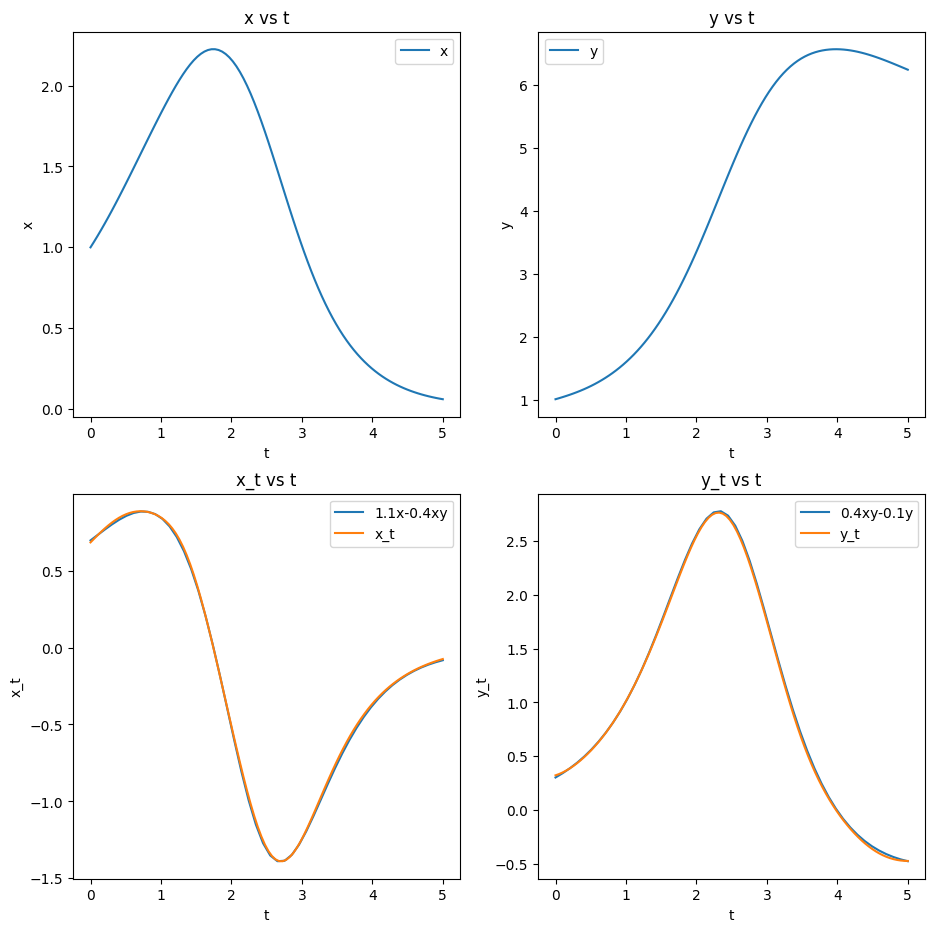

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(11, 11))
t = np.linspace(0., 5.)
x = lv.endog_vars["x"].derivatives["x"](torch.Tensor(t).unsqueeze(-1).to(lv.device)).detach().cpu().numpy()
y = lv.endog_vars["y"].derivatives["y"](torch.Tensor(t).unsqueeze(-1).to(lv.device)).detach().cpu().numpy()
lv.endog_vars["x"].plot("x", {"t": [0., 5.]}, ax=ax[0][0])
lv.endog_vars["y"].plot("y", {"t": [0., 5.]}, ax=ax[0][1])
ax[1][0].plot(t, 1.1*x-0.4*x*y, label="1.1x-0.4xy")
ax[1][1].plot(t, 0.4*x*y-0.1*y, label="0.4xy-0.1y")
lv.endog_vars["x"].plot("x_t", {"t": [0., 5.]}, ax=ax[1][0])
lv.endog_vars["y"].plot("y_t", {"t": [0., 5.]}, ax=ax[1][1])
plt.subplots_adjust()
plt.show()